In [38]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import sys

In [39]:
churners_df = pd.read_csv("../../data/BankChurners.csv", index_col='CLIENTNUM', sep= ',')
churners_df.columns


Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

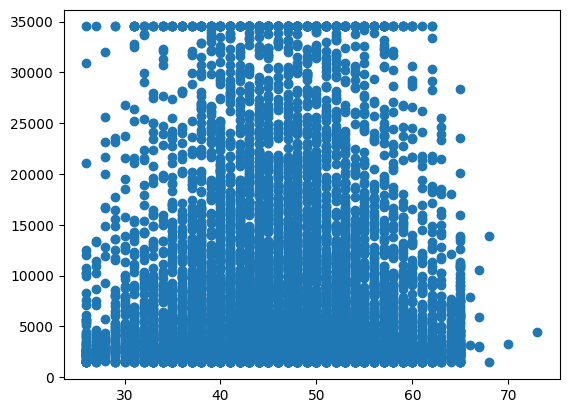

In [40]:
plt.scatter(churners_df['Customer_Age'], churners_df['Credit_Limit'])

In [41]:
km = KMeans(n_clusters=3, random_state=42)
y_pred = km.fit_predict(churners_df[['Customer_Age', 'Credit_Limit']])
print(y_pred)

churners_df['cluster'] = y_pred
churners_df.head()

[2 0 0 ... 0 0 2]


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,cluster
CLIENTNUM,,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991,2
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994,0
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998,0
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987,0
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998,0


TypeError: 'module' object is not callable

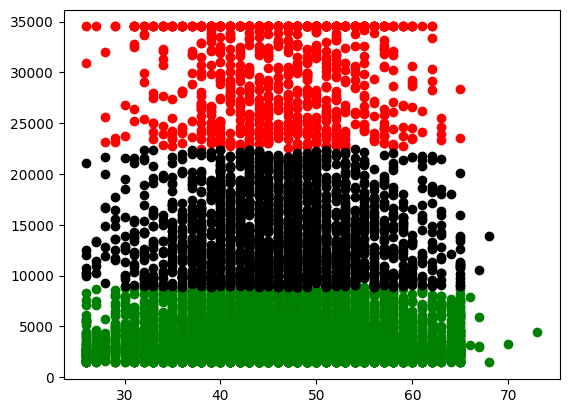

In [45]:
df1 = churners_df[churners_df['cluster'] == 0]
df2 = churners_df[churners_df['cluster'] == 1]
df3 = churners_df[churners_df['cluster'] == 2]

plt.scatter(df1['Customer_Age'], df1['Credit_Limit'], color='green')
plt.scatter(df2['Customer_Age'], df2['Credit_Limit'], color='red')
plt.scatter(df3['Customer_Age'], df3['Credit_Limit'], color='black')

plt(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.xlabel('Age')
plt.ylabel('Credit Limit')
plt.legend()
plt.show()